In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.hyperparams as hyp
import lbg_forecast.tools as tools
import matplotlib.pyplot as plt
import lbg_forecast.sps as sp
from astropy.cosmology import WMAP9 as cosmo


In [3]:
#uniform distribution for all
hyper_parameter_bounds = hyp.define_hyperparameter_bounds(
    
    zred = np.array([0, 0, 7]),
    logtage = np.array([0, -3, 1]),
    logzsol = np.array([0, -2.5, 0.5]),
    dust1 = np.array([0, 0, 2]),
    dust2 = np.array([0, 0, 2]),
    igm_factor = np.array([0, 0, 2]),#np.array([2, 0, 2]),
    gas_logu = np.array([0, -4, -1]),
    logfagn = np.array([0, -5, 1]),
    imf1 = np.array([0, 0.2, 2.6]), 
    imf2 = np.array([0, 1.0, 3.4]), 
    imf3 = np.array([0, 1.0, 3.4]), 
    logtau = np.array([0, -4, 1]),
    loga = np.array([0, -3, 3]),
    logb = np.array([0, -3, 3]),
    logmass = np.array([0, 7, 13])

)

hyperparameters = hyp.sample_hyper_parameters(hyper_parameter_bounds)
#hyp.plot_hyperparameters(10000, hyper_parameter_bounds, rows=7, nbins=20)


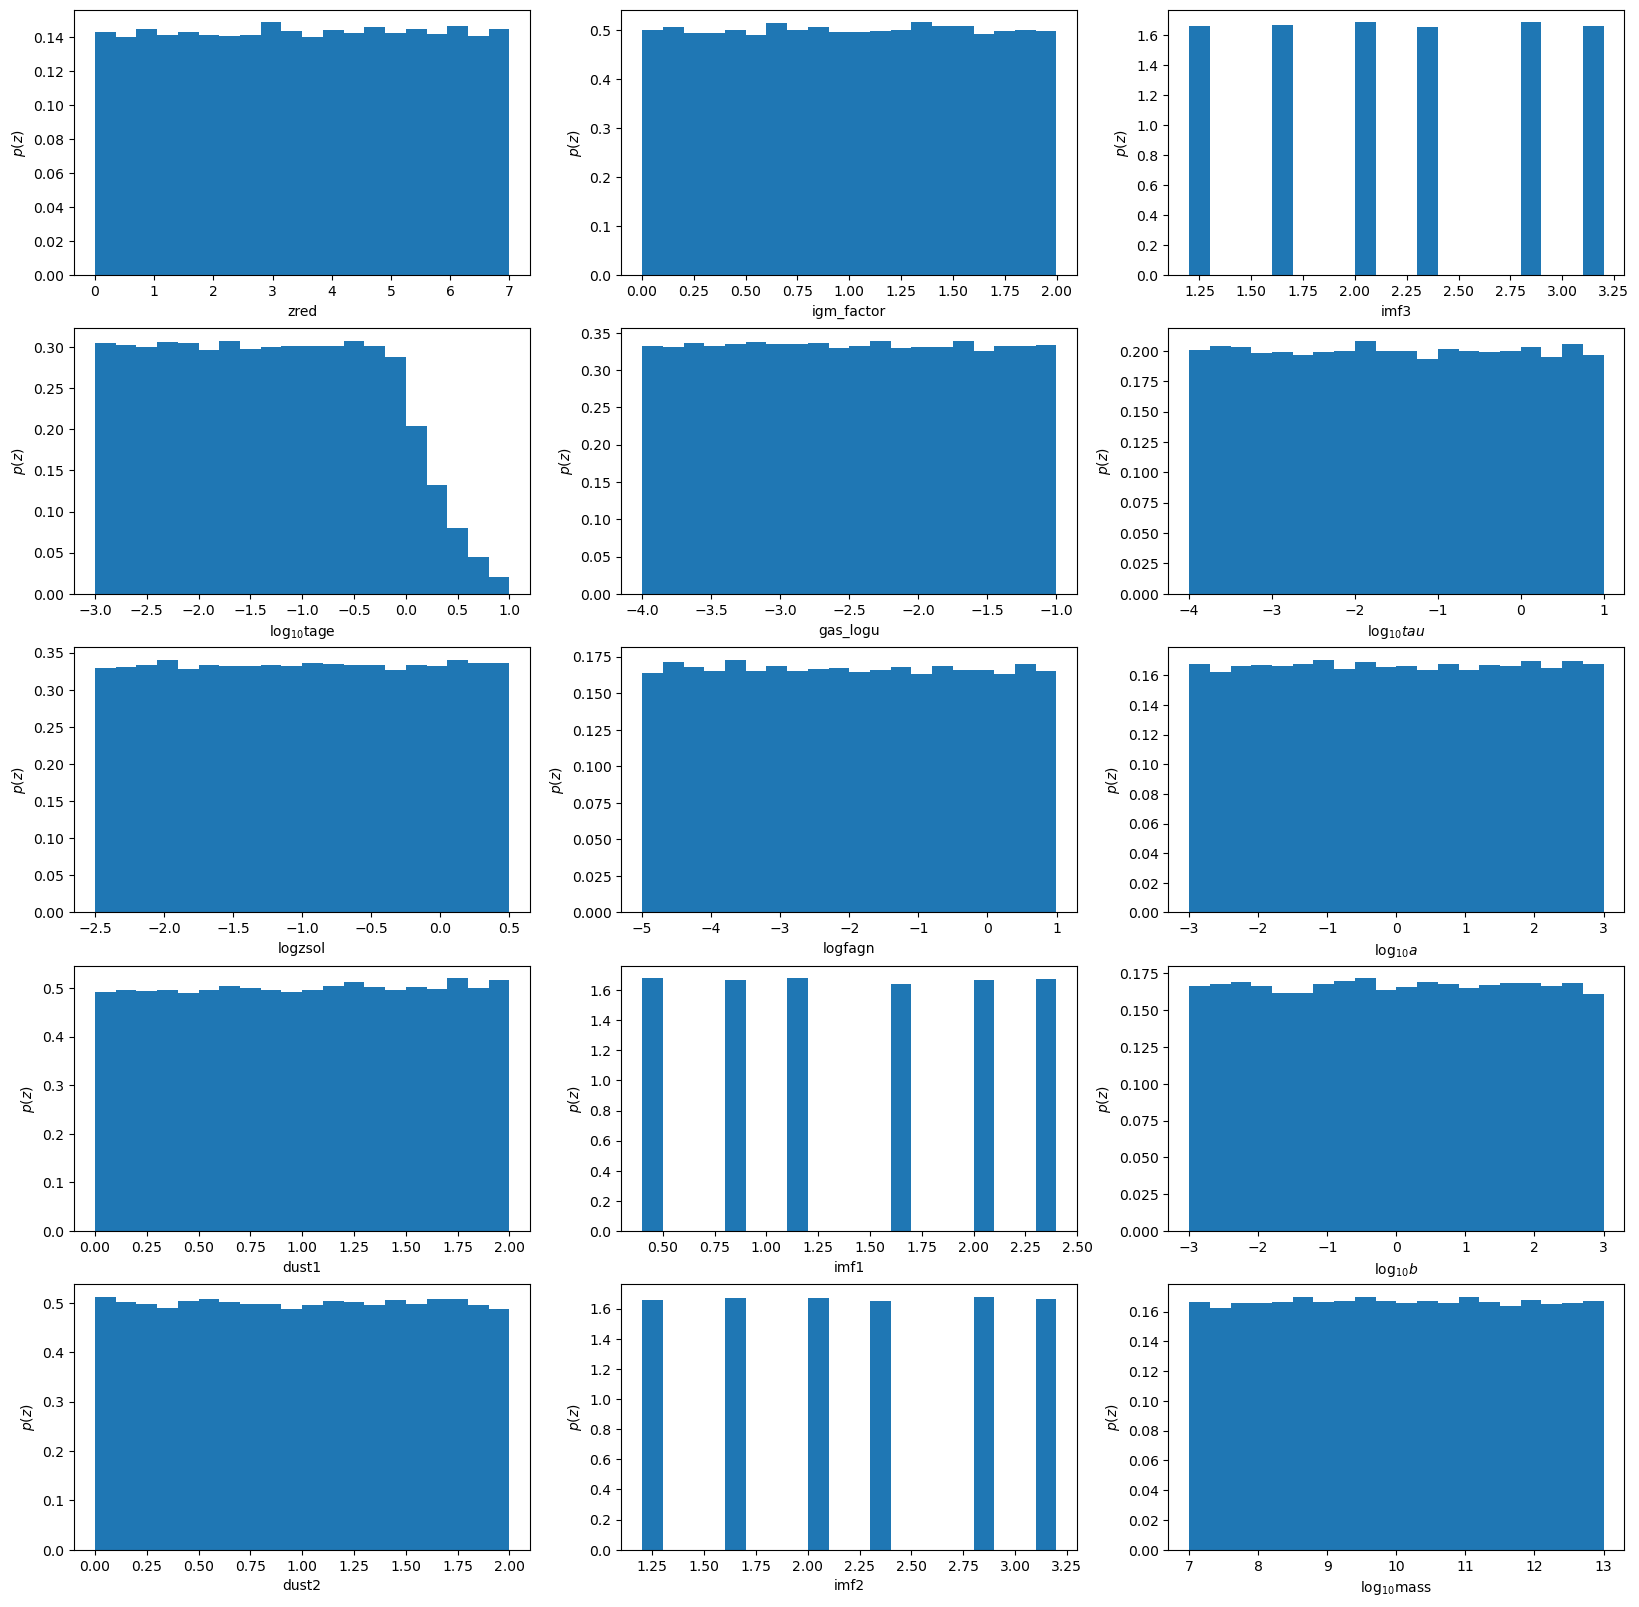

In [4]:
spsparams = tools.draw_sps_parameters(100000, hyperparameters)
tools.plot_galaxy_population(spsparams)

In [5]:
data = tools.simulate_photometry(1, hyperparameters, dust_type=0, imf_type=2, zhistory=True, nebem=True, filters='all')

SPS Parameters Generated
Starting Run 1/3
libraries:  (b'mist', b'miles', b'DL07')


/Users/fpetri/repos/LBGforecast/lbg_forecast/sfh.py:8: RuntimeWarning: overflow encountered in power
  return ((t/tau)**(a) + (t/tau)**(-b))**(-1)


Run 2/3 Complete
Run 3/3 Complete
Complete


Galaxy Age (Gyr): 0.0021182900561558028
Age of the universe at given redshift (Gyr): 2.6433801806857202
Redshift: 2.509280728867398
Observed Metallicity (Absolute Metallicity): 0.023490504771101928


(array([4.49043428e-05, 4.49601593e-05, 4.50165487e-05, 4.50735170e-05,
        4.51310702e-05, 4.51892141e-05, 4.52479548e-05, 4.53072986e-05,
        4.53672515e-05, 4.54278198e-05, 4.54890099e-05, 4.55508282e-05,
        4.56132810e-05, 4.56763749e-05, 4.57401164e-05, 4.58045123e-05,
        4.58695692e-05, 4.59352940e-05, 4.60016934e-05, 4.60687744e-05,
        4.61365441e-05, 4.62050094e-05, 4.62741775e-05, 4.63440556e-05,
        4.64146511e-05, 4.64859712e-05, 4.65580235e-05, 4.66308153e-05,
        4.67043544e-05, 4.67786484e-05, 4.68537051e-05, 4.69295322e-05,
        4.70061377e-05, 4.70835295e-05, 4.71617159e-05, 4.72407048e-05,
        4.73205045e-05, 4.74011234e-05, 4.74825699e-05, 4.75648524e-05,
        4.76479796e-05, 4.77319601e-05, 4.78168027e-05, 4.79025162e-05,
        4.79891096e-05, 4.80765919e-05, 4.81649722e-05, 4.82542597e-05,
        4.83444638e-05, 4.84355939e-05, 4.85276595e-05, 4.86206701e-05,
        4.87146354e-05, 4.88095654e-05, 4.89054698e-05, 4.900235

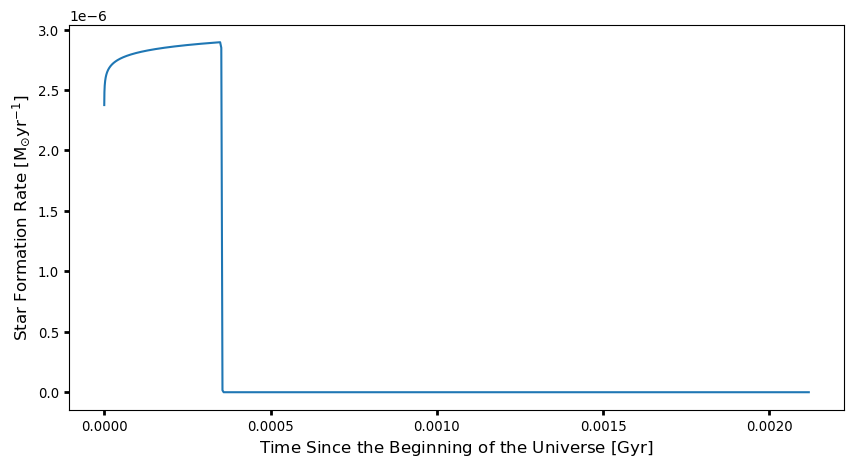

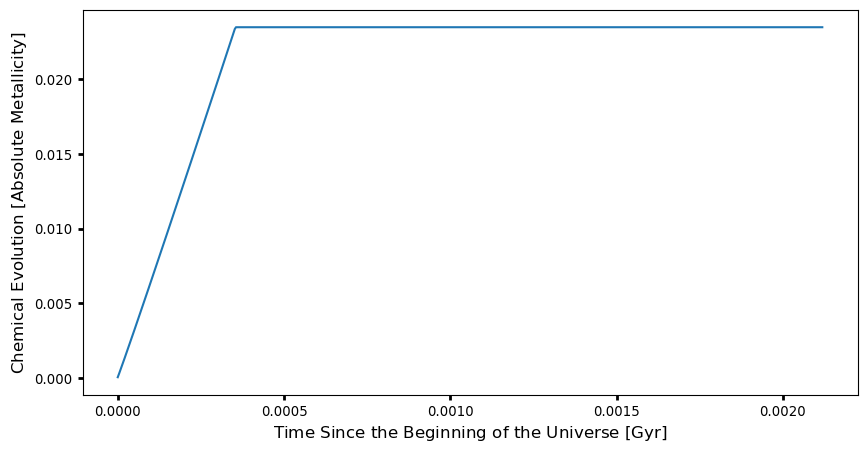

In [6]:
tools.sfh_zhis_diag(data[1], 0)